In [1]:
import xarray as xr
import act
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
clusters = xr.open_dataset('Clusters.nc')
clusters

<xarray.Dataset>
Dimensions:         (time: 24130)
Coordinates:
  * time            (time) datetime64[ns] 2017-06-30T20:10:48.380000 ... 2017-09-24T23:56:54.117368421
Data variables:
    classification  (time) int32 ...

In [3]:
lidar_data = xr.open_mfdataset('/lambda_stor/data/rjackson/coverage_product/*.nc')
lidar_data

/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  """Entry point for launching an IPython kernel.
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/xarray/backends/api.py:941: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  from_openmfds=True,


,Array,Chunk
Bytes,38.41 MB,30.25 kB
Shape,"(24130, 199)","(19, 199)"
Count,3810 Tasks,1270 Chunks
Type,float64,numpy.ndarray
,Array,Chunk
Bytes,1.88 GB,1.48 MB
Shape,"(24130, 199, 49)","(19, 199, 49)"
Count,3810 Tasks,1270 Chunks
Type,float64,numpy.ndarray
,Array,Chunk


In [4]:
clusters = clusters.reindex(time=lidar_data.time, method='nearest')
clusters

<xarray.Dataset>
Dimensions:         (time: 24130)
Coordinates:
  * time            (time) datetime64[ns] 2017-06-30T20:10:48.380000 ... 2017-09-24T23:56:54.117368421
Data variables:
    classification  (time) int32 1 1 1 1 1 1 1 1 1 1 1 ... 2 2 2 2 2 2 2 2 2 2 2

In [4]:
lidar_data.load()

<xarray.Dataset>
Dimensions:                   (range: 199, snr_bins: 49, time: 24130)
Coordinates:
  * snr_bins                  (snr_bins) float64 1.0 2.0 3.0 ... 47.0 48.0 49.0
  * time                      (time) datetime64[ns] 2017-06-30T20:10:48.380000 ... 2017-09-24T23:56:54.117368421
Dimensions without coordinates: range
Data variables:
    snrgt1.000000             (time, range) float64 0.0 68.18 100.0 ... 0.0 0.0
    snr_hist                  (time, range, snr_bins) float64 0.0 0.0 ... 0.0
    snrgt3.000000             (time, range) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    snrgt5.000000             (time, range) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    snrgt10.000000            (time, range) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    mean_velocitygt1.000000   (time, range) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    mean_velocitygt3.000000   (time, range) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    mean_velocitygt5.000000   (time, range) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    mean_velocitygt10.000000  (time, range) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    Time                      (time) datetime64[ns] 2017-06-30T20:10:48.380000 ... 2017-09-24T23:56:54.117368421
    range_bins                (time, range) float64 0.0 60.0 ... 1.188e+04

In [51]:
time_bins = np.arange(0., 25., 2.)
snr_means = np.zeros((6, 12, 199))
hours = clusters.time.dt.hour - 5
hours[hours < 0] = hours[hours < 0] + 24
for i in range(6):
    for j in range(12):
        inds = np.argwhere(np.logical_and.reduce(
            (clusters.classification.values == i, hours >= time_bins[j], hours < time_bins[j+1])))
        for k in range(199):
            snr_means[i, j, k] = np.nansum(lidar_data.snr_hist.values[inds, k, 10:])/np.nansum(lidar_data.snr_hist.values[inds, k, :])*100
            #snr_means[i, j, k] = snr_means[i, j, k]/np.nansum(lidar_data.snr_hist.values[inds, k, :])
snr_means[~np.isfinite(snr_means)] = 0

/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


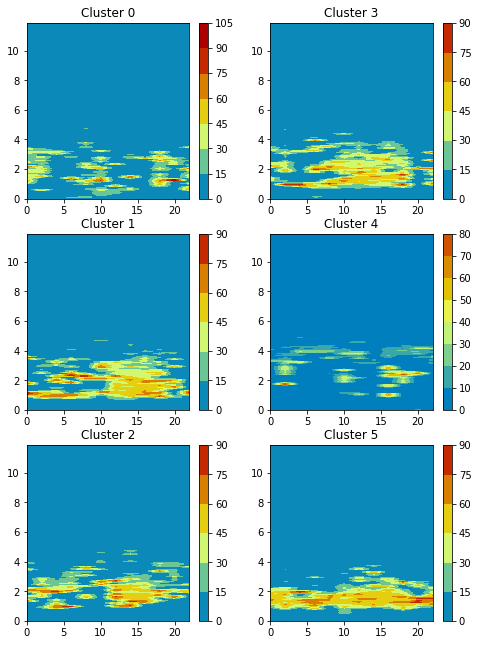

In [52]:
x, y = np.meshgrid(time_bins[:-1], lidar_data.range_bins[0].values/1e3)
fig, ax = plt.subplots(3, 2, figsize=(8, 11))
c = ax[0,0].contourf(x, y, snr_means[0].T, vmin=0, vmax=100, cmap='act_HomeyerRainbow')
ax[0,0].set_title('Cluster 0')
#c.set_clim([0, 30])
cax = plt.colorbar(c, ax=ax[0,0])
c = ax[1,0].contourf(x, y, snr_means[1].T, vmin=0, vmax=100,cmap='act_HomeyerRainbow')
ax[1,0].set_title('Cluster 1')
#c.set_clim([0, 30])
cax = plt.colorbar(c, ax=ax[1,0])
c = ax[2,0].contourf(x, y, snr_means[2].T, vmin=0, vmax=100, cmap='act_HomeyerRainbow')
ax[2,0].set_title('Cluster 2')
#c.set_clim([0, 30])
cax = plt.colorbar(c, ax=ax[2,0])
c = ax[0,1].contourf(x, y, snr_means[3].T, vmin=0, vmax=100,cmap='act_HomeyerRainbow')
ax[0,1].set_title('Cluster 3')
#c.set_clim([0, 30])
cax = plt.colorbar(c, ax=ax[0,1])
c = ax[1,1].contourf(x, y, snr_means[4].T, vmin=0, vmax=100,cmap='act_HomeyerRainbow')
ax[1,1].set_title('Cluster 4')
#c.set_clim([0, 30])
cax = plt.colorbar(c, ax=ax[1,1])
c = ax[2,1].contourf(x, y, snr_means[5].T, vmin=0, vmax=100, cmap='act_HomeyerRainbow')
ax[2,1].set_title('Cluster 5')
#c.set_clim([0, 30])
cax = plt.colorbar(c, ax=ax[2,1])

In [8]:
cfads = np.zeros((6, 199, 49))
for i in range(6):
    inds = np.argwhere(clusters.classification.values == i)
    for j in range(199):
        cfads[i, j, :] = lidar_data.snr_hist.values[inds, j, :].sum(axis=0)
        cfads[i, j, :] = cfads[i, j, :]/(len(inds)*200)*100

/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: Use the colorbar set_ticks() method instead.
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: Use the colorbar set_ticks() method instead.
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/ipykernel_launcher.py:45: UserWarning: Use the colorbar set_ticks() method instead.
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/ipykernel_launcher.py:54: UserWarning: Use the colorbar set_ticks() method instead.


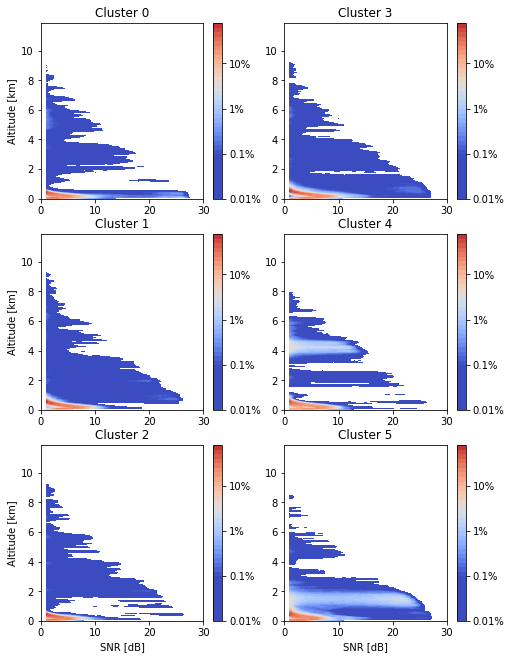

In [21]:
x, y = np.meshgrid(lidar_data.range_bins[0].values/1e3, lidar_data.snr_bins.values)
cfads = np.where(cfads > 0, cfads, np.nan)
fig, ax = plt.subplots(3, 2, figsize=(8, 11))
c = ax[0,0].contourf(y, x, np.log10(cfads[0].T), vmin=-2, vmax=2, levels=np.arange(-2, 2, 0.1), cmap='coolwarm')
c.set_clim([-1, 2])
ax[0,0].set_xlim([0, 30])
#ax[0,0].set_xlabel('SNR [dB]')
ax[0,0].set_ylabel('Altitude [km]')
ax[0,0].set_title('Cluster 0')
cax = plt.colorbar(c, ax=ax[0,0], ticks=[-2, -1, 0, 1, 2])
cax.ax.set_yticklabels(['0.01%', '0.1%', '1%', '10%', '100%'])
c = ax[1,0].contourf(y, x, np.log10(cfads[1].T), vmin=-2, vmax=2, levels=np.arange(-2, 2, 0.1), cmap='coolwarm')
c.set_clim([-1, 2])
ax[1,0].set_xlim([0, 30])
#ax[1,0].set_xlabel('SNR [dB]')
ax[1,0].set_ylabel('Altitude [km]')
ax[1,0].set_title('Cluster 1')
cax = plt.colorbar(c, ax=ax[1,0], ticks=[-2, -1, 0, 1, 2])
cax.ax.set_yticklabels(['0.01%', '0.1%', '1%', '10%', '100%'])
c = ax[2,0].contourf(y, x, np.log10(cfads[2].T), vmin=-2, vmax=2, levels=np.arange(-2, 2, 0.1), cmap='coolwarm')
c.set_clim([-1, 2])
ax[2,0].set_xlim([0, 30])
ax[2,0].set_xlabel('SNR [dB]')
ax[2,0].set_ylabel('Altitude [km]')
ax[2,0].set_title('Cluster 2')
cax = plt.colorbar(c, ax=ax[2,0], ticks=[-2, -1, 0, 1, 2])
cax.ax.set_yticks([-1, 0, 1, 2])
cax.ax.set_yticklabels(['0.01%', '0.1%', '1%', '10%', '100%'])
c = ax[0,1].contourf(y, x, np.log10(cfads[3].T), vmin=-2, vmax=2, levels=np.arange(-2, 2, 0.1), cmap='coolwarm')
c.set_clim([-1, 2])
ax[0,1].set_xlim([0, 30])
#ax[0,1].set_xlabel('SNR [dB]')
#ax[0,1].set_ylabel('Altitude [km]')
ax[0,1].set_title('Cluster 3')
cax = plt.colorbar(c, ax=ax[0,1], ticks=[-2, -1, 0, 1, 2])
cax.ax.set_yticks([-1, 0, 1, 2])
cax.ax.set_yticklabels(['0.01%', '0.1%', '1%', '10%', '100%'])
c = ax[1,1].contourf(y, x, np.log10(cfads[4].T), vmin=-2, vmax=2, levels=np.arange(-2, 2, 0.1), cmap='coolwarm')
c.set_clim([-1, 2])
ax[1,1].set_xlim([0, 30])
#ax[1,1].set_xlabel('SNR [dB]')
#ax[1,1].set_ylabel('Altitude [km]')
ax[1,1].set_title('Cluster 4')
cax = plt.colorbar(c, ax=ax[1,1], ticks=[-2, -1, 0, 1, 2])
cax.ax.set_yticks([-1, 0, 1, 2])
cax.ax.set_yticklabels(['0.01%', '0.1%', '1%', '10%', '100%'])
c = ax[2,1].contourf(y, x, np.log10(cfads[5].T), vmin=-2, vmax=2, levels=np.arange(-2, 2, 0.1), cmap='coolwarm')
c.set_clim([-1, 2])
ax[2,1].set_xlim([0, 30])
ax[2,1].set_xlabel('SNR [dB]')
#ax[2,1].set_ylabel('Altitude [km]')
ax[2,1].set_title('Cluster 5')
cax = plt.colorbar(c, ax=ax[2,1], ticks=[-2, -1, 0, 1, 2])
cax.ax.set_yticks([-1, 0, 1, 2])
cax.ax.set_yticklabels(['0.01%', '0.1%', '1%', '10%', '100%'])
fig.savefig('Cfads_clusters.png', dpi=300)

In [125]:
np.log10(cfads[0].T)

array([[1.30478865, 1.20842847, 0.70862756, ...,        nan,        nan,
               nan],
       [1.1487858 , 1.4006361 , 1.07249281, ...,        nan,        nan,
               nan],
       [0.98135464, 1.4110069 , 1.23398121, ...,        nan,        nan,
               nan],
       ...,
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]])

In [99]:
lidar_data2 = xr.open_mfdataset('/lambda_stor/data/rjackson/sgp_lidar/*moments*.nc')

/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  """Entry point for launching an IPython kernel.
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/xarray/backends/api.py:941: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  from_openmfds=True,


In [102]:
lidar_data2.time[0:10].values

array(['2017-06-30T20:10:48.380000000', '2017-06-30T20:10:49.930000000',
       '2017-06-30T20:10:51.470000000', '2017-06-30T20:10:53.020000000',
       '2017-06-30T20:10:54.560000000', '2017-06-30T20:10:56.100000000',
       '2017-06-30T20:10:57.650000000', '2017-06-30T20:10:59.190000000',
       '2017-06-30T20:11:00.730000000', '2017-06-30T20:11:02.280000000'],
      dtype='datetime64[ns]')